# Model Linear Regression
### By : Nguyễn Minh Hiếu 

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('BIT220059_NGUYEN_MINH_HIEU_LRdata.csv')
df.head()

,housing_age,House_area,total_rooms,House_price
0,2.0,52.49,1.98,1.199901e+09
1,1.4,54.86,1.54,1.096118e+09
2,1.9,59.06,1.37,1.092304e+09
3,1.4,54.55,1.87,1.110055e+09
4,1.9,53.78,1.37,1.092672e+09


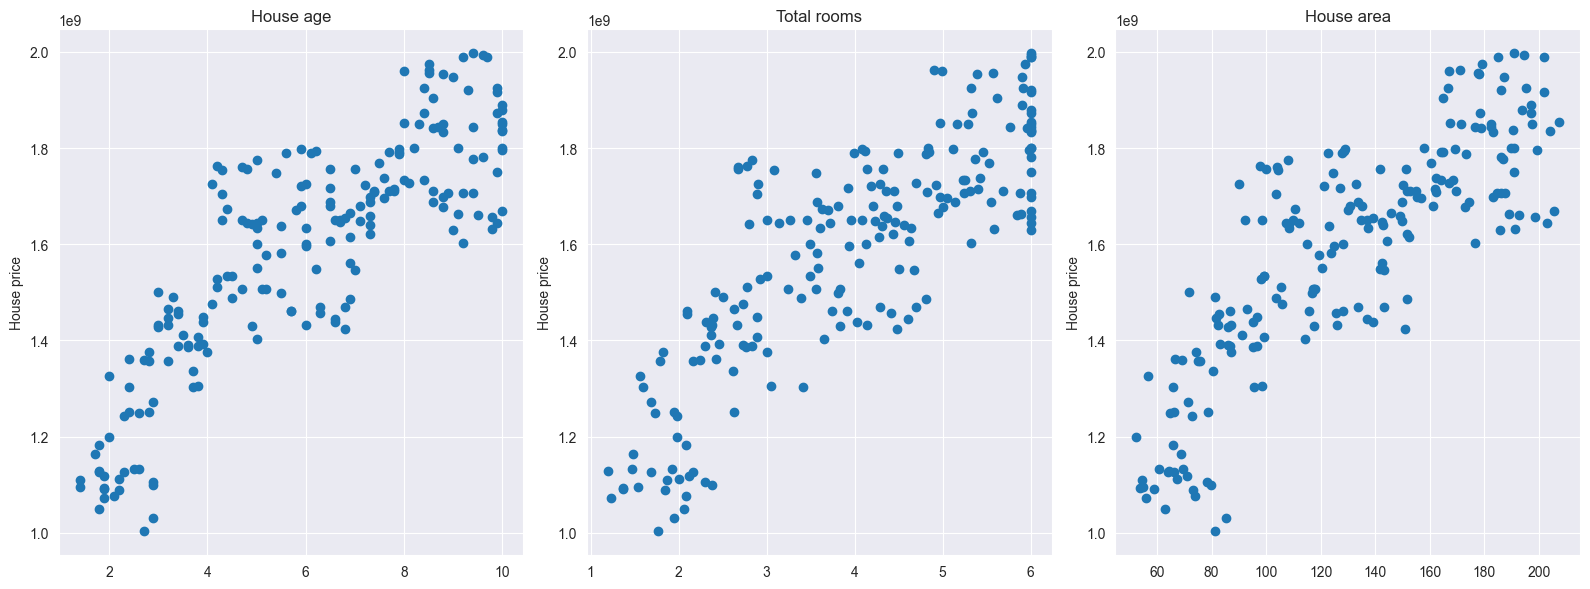

In [4]:
# Tạo các biểu đồ phân tích mối quan hệ giữa giá nhà và các yếu tố khác
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

# Biểu đồ 1: Giá nhà và tuổi nhà
axes[0].plot(df['housing_age'], df['House_price'], 'o')
axes[0].set_ylabel("House price")
axes[0].set_title("House age")

# Biểu đồ 2: Giá nhà và tổng số phòng
axes[1].plot(df['total_rooms'], df['House_price'], 'o')
axes[1].set_title("Total rooms")
axes[1].set_ylabel("House price")

# Biểu đồ 3: Giá nhà và diện tích nhà
axes[2].plot(df['House_area'], df['House_price'], 'o')
axes[2].set_title("House area")
axes[2].set_ylabel("House price")

# Tự động điều chỉnh layout để không bị chồng lấn
plt.tight_layout()


## Huấn luyện mô hình | Chia dữ liệu 

In [5]:
# Chuẩn bị dữ liệu cho mô hình hồi quy
X = df.drop('House_price', axis=1)  # Loại bỏ cột giá nhà
y = df['House_price']               # Mục tiêu là cột giá nhà

In [6]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Dự đoán và đánh giá

In [13]:
# Dự đoán giá nhà cho tập kiểm tra
House_price_predict = model.predict(X_test)
House_price_predict

array([1.37781489e+09, 1.65900788e+09, 1.35145530e+09, 1.51547283e+09,
       1.48706590e+09, 1.65543500e+09, 1.45133998e+09, 1.51064458e+09,
       1.73427272e+09, 1.78745982e+09, 1.81180818e+09, 1.62895728e+09,
       1.84203068e+09, 1.40446324e+09, 1.73105385e+09, 1.73897978e+09,
       1.29948740e+09, 1.33545961e+09, 1.82662858e+09, 1.35684093e+09,
       1.86544144e+09, 1.78030656e+09, 1.84418273e+09, 1.48859348e+09,
       1.43380693e+09, 1.44771863e+09, 1.37559785e+09, 1.68876835e+09,
       1.90286045e+09, 1.26086719e+09, 1.30661219e+09, 1.72692507e+09,
       1.59831930e+09, 1.34000049e+09, 1.37701424e+09, 1.38316643e+09,
       1.65630792e+09, 1.89571730e+09, 1.80428434e+09, 1.86159886e+09,
       1.27532663e+09, 1.91026897e+09, 1.74758690e+09, 1.65539447e+09,
       1.56073988e+09, 1.31917579e+09, 1.51724248e+09, 1.38808187e+09,
       1.26392358e+09, 1.32215138e+09, 1.23150774e+09, 1.42467542e+09,
       1.61755156e+09, 1.87441973e+09, 1.27086155e+09, 1.80429633e+09,
      

In [14]:
# Đánh giá mô hình bằng MAE, MSE và RMSE
MAE = mean_absolute_error(y_test, House_price_predict)
MSE = mean_squared_error(y_test, House_price_predict)
RMSE = np.sqrt(MSE)

In [15]:
print(f'Đánh giá mô hình : MAE = {MAE} , MSE = {MSE} ,RMSE = {RMSE}')

Đánh giá mô hình : MAE = 111517411.57956597 , MSE = 1.8465294007583016e+16 ,RMSE = 135887063.4298314


In [16]:
# In ra giá trung bình của cột House_price
df['House_price'].mean()

1582101320.37

## Kiểm tra phần dư 

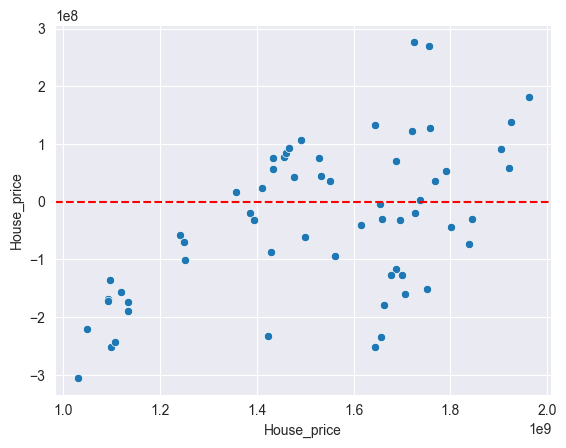

In [17]:
# Kiểm tra residuals (phần dư) của dự đoán
test_residuals = y_test - House_price_predict
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

## Huấn luyện mô hình với toàn bộ dữ liệu

In [18]:
# Huấn luyện mô hình hồi quy tuyến tính với toàn bộ dữ liệu
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [19]:
# Hệ số hồi quy của mô hình
final_model.coef_

array([ 1.05885248e+08, -2.56482318e+06,  3.27132146e+07])

In [20]:
# Dự đoán giá nhà với toàn bộ dữ liệu
y_hat = final_model.predict(X)

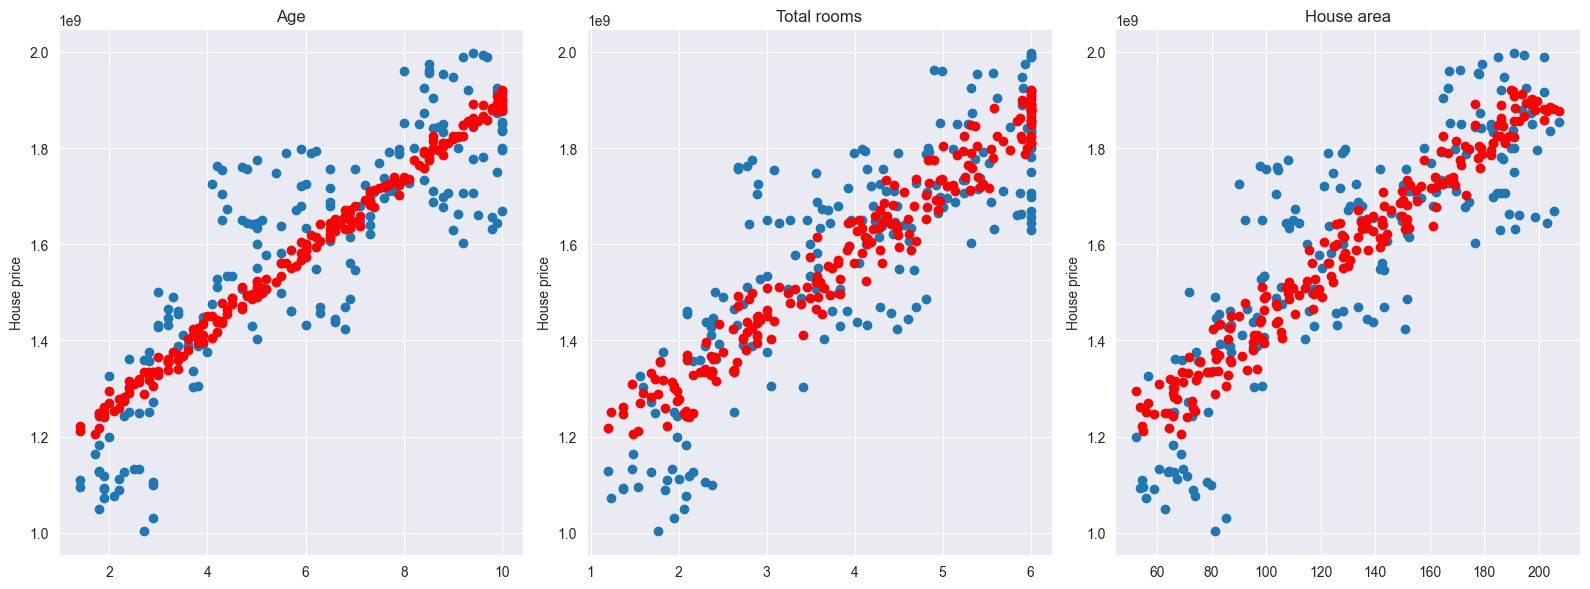

In [21]:
# Vẽ lại biểu đồ với đường hồi quy (dự đoán giá nhà)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

# Biểu đồ 1: Giá nhà dự đoán theo tuổi nhà
axes[0].plot(df['housing_age'], df['House_price'], 'o')
axes[0].plot(df['housing_age'], y_hat, 'o', color='red')
axes[0].set_ylabel("House price")
axes[0].set_title("Age")

# Biểu đồ 2: Giá nhà dự đoán theo tổng số phòng
axes[1].plot(df['total_rooms'], df['House_price'], 'o')
axes[1].plot(df['total_rooms'], y_hat, 'o', color='red')
axes[1].set_title("Total rooms")
axes[1].set_ylabel("House price")

# Biểu đồ 3: Giá nhà dự đoán theo diện tích nhà
axes[2].plot(df['House_area'], df['House_price'], 'o')
axes[2].plot(df['House_area'], y_hat, 'o', color='red')
axes[2].set_title("House area")
axes[2].set_ylabel("House price")

# Tự động điều chỉnh layout
plt.tight_layout()

## Lưu và tải mô hình

In [24]:
# Lưu mô hình đã huấn luyện thành file joblib
dump(final_model, 'Dudoangianha.joblib')

['Dudoangianha.joblib']

In [25]:
# Tải mô hình từ file joblib
load_model = load('Dudoangianha.joblib')

In [26]:
# In ra hệ số hồi quy của mô hình đã tải
load_model.coef_

array([ 1.05885248e+08, -2.56482318e+06,  3.27132146e+07])

In [27]:
# Thử dự đoán với dữ liệu mới
campaign = [[154.23, 2.3, 3.2]]
load_model.predict(campaign)

C:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.75825325e+10])